In [1]:
import pandas as pd
import os

In [298]:
filelist = os.listdir(r'C:\Users\Yunseok Choi\Downloads\AI Education')

In [299]:
for file in filelist:
    if file == 'savedrecs (1).xls':
        df1 = pd.read_excel(r'C:\Users\Yunseok Choi\Downloads\AI Education\{}'.format(file))
    else:
        df2 = pd.read_excel(r'C:\Users\Yunseok Choi\Downloads\AI Education\{}'.format(file))
        df1 = pd.concat([df1, df2])
df1.to_excel(excel_writer = r'C:\Users\Yunseok Choi\Downloads\AI Education\AI_Education_PUB.xlsx')

In [300]:
filelist = os.listdir(r'C:\Users\Yunseok Choi\Downloads\AI Healthcare')

In [ ]:
for file in filelist:
    if file == 'savedrecs (1).xls':
        df1 = pd.read_excel(r'C:\Users\Yunseok Choi\Downloads\AI Healthcare\{}'.format(file))
    else:
        df2 = pd.read_excel(r'C:\Users\Yunseok Choi\Downloads\AI Healthcare\{}'.format(file))
        df1 = pd.concat([df1, df2])
df1.to_excel(excel_writer = r'C:\Users\Yunseok Choi\Downloads\AI Healthcare\AI_Healthcare_PUB.xlsx')

# Analysis

In [2]:
import pandas as pd
import os
import operator
import time
import re
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel(r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Healthcare_PUB.xlsx')
#df = pd.read_excel(r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Education_PUB.xlsx')
df.shape
#year nan 제거
df = df.dropna(subset = ['Publication Year'])
df.shape
#year nan 제거
df = df.dropna(subset = ['Reprint Addresses'])
df.shape

(7181, 68)

In [5]:
years = df['Publication Year'].unique().tolist()
years.sort()
years.remove(2022)
years.remove(2021)
year_pubnum=[]
pub_year = []
pub_num = []
for year in years:
    year_pubnum.append((int(year),df[df['Publication Year']==year].shape[0]))
    pub_year.append(int(year))
    pub_num.append(df[df['Publication Year']==year].shape[0])
    

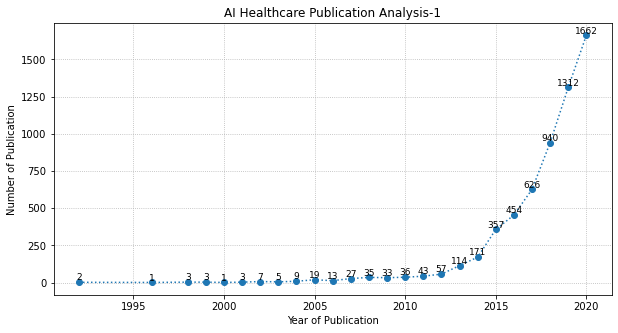

In [6]:
plt.figure(figsize=(10,5))
plt.plot(pub_year,pub_num, marker = 'o', linestyle=':')
plt.grid(linestyle=':')
plt.title('AI Education Publication Analysis-1')
#plt.title('AI Healthcare Publication Analysis-1')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Publication')
for i,v in enumerate(pub_year):
    plt.text(v, pub_num[i], str(pub_num[i]), fontsize = 9, color='black',
             horizontalalignment='center', verticalalignment='bottom')

In [12]:
df = pd.read_excel(r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Education_PUB_country.xlsx')
df.dropna(subset = ['Country'], inplace = True)
#df = pd.read_excel(r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Healthcare_PUB_country.xlsx')

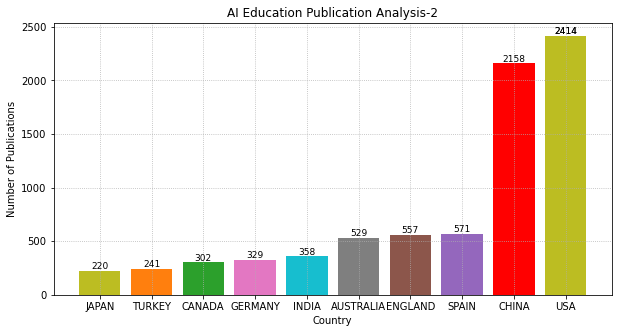

In [15]:
country = {}
for item in df['Country']:
    if item.upper() not in country.keys():
        country[item.upper()]=1
    else:
        country[item.upper()]+=1
country['CHINA'] += country['TAIWAN']
country_s = dict(sorted(country.items(),key=operator.itemgetter(1)))
country_name = list(country_s.keys())
country_name.remove('TAIWAN')
country_name = country_name[::-1][:10][::-1]
country_name.append('USA')
pub_num = []
for key in country_name:
    pub_num.append(country_s[key])
plt.figure(figsize=(10,5))
colors = ['C8','C1','C2','C6','C9','C7','C5','C4','r','C0']
#colors = ['C0','C1','C2','C7','C4','C5','C6','r','C8','C9','C0']
plt.bar(country_name,pub_num, color = colors)
plt.grid(linestyle=':')
plt.title('AI Education Publication Analysis-2')
#plt.title('AI Healthcare Publication Analysis-2')
plt.xlabel('Country')
plt.ylabel('Number of Publications')
for i,v in enumerate(country_name):
    plt.text(v, pub_num[i], str(pub_num[i]), fontsize = 9, color='black',
             horizontalalignment='center',verticalalignment='bottom')

In [341]:
top10 = ['GERMANY','SAUDI ARABIA','CANADA','AUSTRALIA','ITALY','KOREA','ENGLAND','CHINA','INDIA','USA']
colors = ['C0','C1','C2','C7','C4','C5','C6','r','C8','C9','C0']
color_code = {}
for i in range(10):
    color_code[top10[i]] = colors[i]

In [342]:
germany = []
arabia= []
canada = []
australia = []
italy = []
korea = []
england = []
china = []
india = []
usa = []
for year in pub_year:
    data = df[df['Publication Year'] == year]
    dic = {'GERMANY':0,'ARABIA':0,'CANADA':0,'AUSTRALIA':0,'ITALY':0,
          'KOREA':0,'ENGLAND':0,'CHINA':0,'INDIA':0,'USA':0}
    for address in data['Reprint Addresses'].dropna().values:
        target = address.split(',')[-1].split(' ')[-1].rstrip('.')
        #print(target.upper())
        if target.upper() in dic.keys():
            dic[target.upper()] += 1
        if target.upper() == 'TAIWAN':
            dic['CHINA'] +=1
    germany.append(dic['GERMANY'])
    arabia.append(dic['ARABIA'])
    canada.append(dic['CANADA'])
    australia.append(dic['AUSTRALIA'])
    italy.append(dic['ITALY'])
    korea.append(dic['KOREA'])
    england.append(dic['ENGLAND'])
    china.append(dic['CHINA'])
    india.append(dic['INDIA'])
    usa.append(dic['USA'])


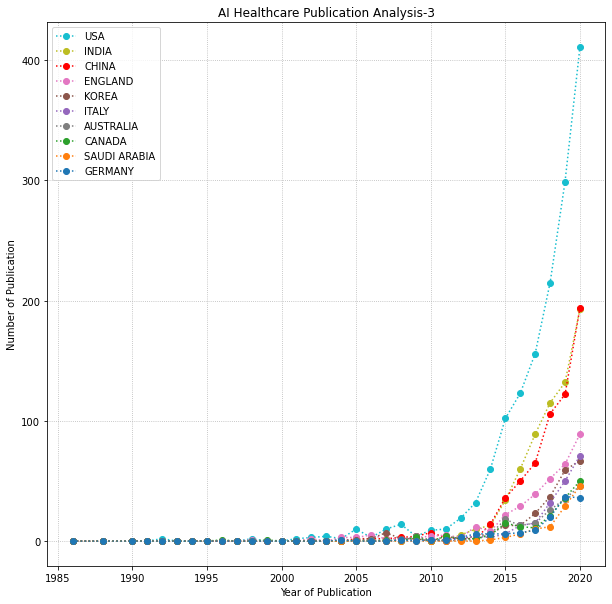

In [343]:
plot_y = {'GERMANY':germany,'SAUDI ARABIA':arabia,'CANADA':canada,'AUSTRALIA':australia,
         'ITALY':italy,'KOREA':korea,'ENGLAND':england,'CHINA':china,'INDIA':india,
         'USA':usa}
plt.figure(figsize=(10,10))
for item in top10[::-1]:
    pub_num = plot_y[item]
    plt.plot(pub_year,pub_num, marker = 'o', linestyle=':', 
             color = color_code[str(item.upper())])
    plt.grid(linestyle=':')
    plt.title('AI Healthcare Publication Analysis-3')
    plt.xlabel('Year of Publication')
    plt.ylabel('Number of Publication')
    '''
    if item == 'USA':
        for i,v in enumerate(pub_year):
            plt.text(v, pub_num[i], str(pub_num[i]), fontsize = 9, color='black',
                     horizontalalignment='center', verticalalignment='bottom')
    '''
plt.legend(top10[::-1])

# Analysis by Author
### Healthcare

In [441]:
df = pd.read_excel(r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Healthcare_PUB_country.xlsx')

In [446]:
df = df.dropna(subset = ['Addresses'])
df.reset_index(inplace = True)

In [443]:
total_list = []
for i in range(len(df['Addresses'])):
    strlist = ''
    for item in df['Addresses'][i].split('[')[1:]:
        target = item.split(',')[-1].lstrip(' ').rstrip('; ')
        if 'USA' in target:
            strlist += 'USA;'  
        elif ('China' in target) or ('Taiwan' in target):
            strlist += 'China;'
        elif 'U Arab Emirate' in target:
            strlist += 'Arab Emirate;'
        else:
            strlist += (target+';')
    total_list.append(strlist)

In [444]:
df['Country by Authors'] = total_list

In [3]:
df = pd.read_excel(r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Healthcare_PUB_CountrybyAuthors.xlsx')

In [727]:
years = list(set(df['Publication Year'].values.tolist()))
years.remove(2022)
years.remove(2021)
years

[1992,
 1996,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [4]:
years = [2000,
         2001,
         2002,
         2003,
         2004,
         2005,
         2006,
         2007,
         2008,
         2009,
         2010,
         2011,
         2012,
         2013,
         2014,
         2015,
         2016,
         2017,
         2018,
         2019,
         2020]

In [5]:
yearly_count=[]
for year in years:
    countries = dict()
    total_list = []
    for item in df[df['Publication Year'] == year]['Country by Authors']:
        for country in item.split(';'):
            if country != '':
                total_list.append(country)            
    for item in total_list:
        if item not in countries.keys():
            countries[item] = 1
        else:
            countries[item] +=1
    yearly_count.append([year,countries])

In [6]:
germany = []
arabia= []
canada = []
australia = []
italy = []
korea = []
england = []
china = []
india = []
usa = []
for item in yearly_count:
    dic = {'GERMANY':0,'ARABIA':0,'CANADA':0,'AUSTRALIA':0,'ITALY':0,
          'KOREA':0,'ENGLAND':0,'CHINA':0,'INDIA':0,'USA':0}
    if 'Germany' in item[1].keys():
        dic['GERMANY'] += item[1]['Germany']
    if 'Saudi Arabia' in item[1].keys():
        dic['ARABIA'] += item[1]['Saudi Arabia']
    if 'Canada' in item[1].keys():
        dic['CANADA'] += item[1]['Canada']
    if 'Australia' in item[1].keys():
        dic['AUSTRALIA'] += item[1]['Australia']
    if 'Italy' in item[1].keys():
        dic['ITALY'] += item[1]['Italy']
    if 'South Korea' in item[1].keys():
        dic['KOREA'] += item[1]['South Korea']
    if 'England' in item[1].keys():
        dic['ENGLAND'] += item[1]['England']
    if 'China' in item[1].keys():
        dic['CHINA'] += item[1]['China']
    if 'India' in item[1].keys():
        dic['INDIA'] += item[1]['India']
    if 'USA' in item[1].keys():
        dic['USA'] += item[1]['USA']
    germany.append(dic['GERMANY'])
    arabia.append(dic['ARABIA'])
    canada.append(dic['CANADA'])
    australia.append(dic['AUSTRALIA'])
    italy.append(dic['ITALY'])
    korea.append(dic['KOREA'])
    england.append(dic['ENGLAND'])
    china.append(dic['CHINA'])
    india.append(dic['INDIA'])
    usa.append(dic['USA'])

In [7]:
top10 = ['GERMANY','SAUDI ARABIA','CANADA','AUSTRALIA','ITALY','KOREA','ENGLAND','CHINA','INDIA','USA']
colors = ['C0','C1','C2','C7','C4','C5','C6','r','C8','C9','C0']
color_code = {}
for i in range(10):
    color_code[top10[i]] = colors[i]

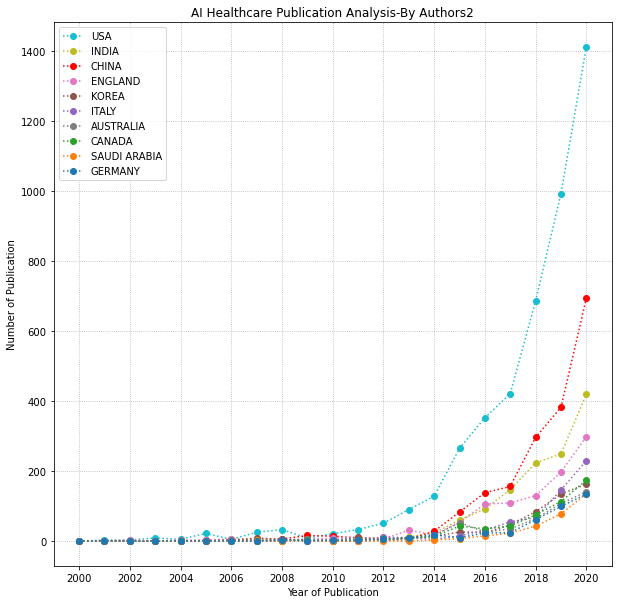

In [12]:
plot_y = {'GERMANY':germany,'SAUDI ARABIA':arabia,'CANADA':canada,'AUSTRALIA':australia,
         'ITALY':italy,'KOREA':korea,'ENGLAND':england,'CHINA':china,'INDIA':india,
         'USA':usa}
plt.figure(figsize=(10,10))
for item in top10[::-1]:
    pub_num = plot_y[item]
    plt.plot(years,pub_num, marker = 'o', linestyle=':', 
             color = color_code[str(item.upper())])
    plt.grid(linestyle=':')
    plt.title('AI Healthcare Publication Analysis-By Authors2')
    plt.xlabel('Year of Publication')
    plt.ylabel('Number of Publication')
    import matplotlib.ticker as mticker
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))
    '''
    if item == 'USA':
        for i,v in enumerate(pub_year):
            plt.text(v, pub_num[i], str(pub_num[i]), fontsize = 9, color='black',
                     horizontalalignment='center', verticalalignment='bottom')
    '''
plt.legend(top10[::-1])

In [733]:
export = pd.DataFrame([germany,arabia,canada,australia,italy,korea,england,china,india,usa], columns=[years], 
            index=['Germany','Saudi Arabia','Canada','Australia','Italy','South Korea','England','China','India','USA'])
export
export.to_excel(excel_writer=r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Healthcare_PUB_Analysis1.1.xlsx')

### Education

In [565]:
df = pd.read_excel(r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Education_PUB_country.xlsx')

In [566]:
df = df.dropna(subset = ['Reprint Addresses'])
df.reset_index(inplace = True)

In [567]:
total_list = []
for i in range(len(df['Addresses'])):
    strlist = ''
    for item in df['Addresses'][i].split('[')[1:]:
        target = item.split(',')[-1].lstrip(' ').rstrip('; ')
        if 'USA' in target:
            strlist += 'USA;'  
        elif ('China' in target) or ('Taiwan' in target):
            strlist += 'China;'
        elif 'U Arab Emirate' in target:
            strlist += 'Arab Emirate;'
        else:
            strlist += (target+';')
    total_list.append(strlist)

In [568]:
df['Country by Authors'] = total_list

In [627]:
df = pd.read_excel(r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Education_PUB_CountrybyAuthors.xlsx')
df.dropna(subset = ['Reprint Addresses'],inplace = True)
df = df.fillna('')
df.reset_index(inplace=True)

In [628]:
index=df[df['Country by Authors'] == ''].index.tolist()
for i in index:
    item = df['Reprint Addresses'][i]
    strlist = ''
    if ';' in item:
        for line in item.split(';'):
            target = line.split(' ')[-1]
            if 'USA' in target:
                strlist += 'USA;'  
            elif ('China' in target) or ('Taiwan' in target):
                strlist += 'China;'
            elif 'U Arab Emirate' in target:
                strlist += 'Arab Emirate;'
            elif target == 'Korea':
                strlist += 'South Korea;'
            else:
                strlist += (target+';')
    elif ';' not in item:
        target = item.split(' ')[-1]
        if 'USA' in target:
            strlist += 'USA;'  
        elif ('China' in target) or ('Taiwan' in target):
            strlist += 'China;'
        elif 'U Arab Emirate' in target:
            strlist += 'Arab Emirate;'
        elif target == 'Korea':
            strlist += 'South Korea;'
        else:
            strlist += (target+';')
    df['Country by Authors'][i] = strlist\
df.to_excel(excel_writer = r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Education_PUB_CountrybyAuthors.xlsx')

<ipython-input-628-6991d9f9fcf9>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country by Authors'][i] = strlist


In [40]:
df = pd.read_excel(r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Education_PUB_CountrybyAuthors.xlsx')
df.dropna(subset = ['Publication Year'], inplace = True)

In [719]:
years =list(set(df['Publication Year'].values.tolist()))
years.remove(2021)
years

[1986.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2018.0,
 2019.0,
 2020.0]

In [41]:
years = [2000,
         2001,
         2002,
         2003,
         2004,
         2005,
         2006,
         2007,
         2008,
         2009,
         2010,
         2011,
         2012,
         2013,
         2014,
         2015,
         2016,
         2017,
         2018,
         2019,
         2020]
years = list(map(int,years))

In [46]:
usa = []
china = []
spain = []
england = []
australia = []
india = []
germany = []
canada = []
turkey = []
for year in years:
    string = ''
    dic = {'USA':0,'China':0,'Spain':0,'England':0,'Australia':0,'India':0,'Germany':0,'Canada':0,'Turkey':0}
    for item in df[df['Publication Year'] == year]['Country by Authors']:
        string += item
    for item in string.split(';'):
        if 'USA' in item:
            dic['USA'] +=1
        elif 'China' in item:
            dic['China'] +=1
        elif 'Spain' in item:
            dic['Spain'] +=1
        elif 'England' in item:
            dic['England'] +=1
        elif 'Australia' in item:
            dic['Australia'] +=1
        elif 'India' in item:
            dic['India'] +=1
        elif 'Germany' in item:
            dic['Germany'] +=1
        elif 'Canada' in item:
            dic['Canada'] +=1
        elif 'Turkey' in item:
            dic['Turkey'] +=1
    usa.append(dic['USA'])
    china.append(dic['China'])
    spain.append(dic['Spain'])
    england.append(dic['England'])
    australia.append(dic['Australia'])
    india.append(dic['India'])
    germany.append(dic['Germany'])
    canada.append(dic['Canada'])
    turkey.append(dic['Turkey'])
        

In [49]:
top10 = ['GERMANY','AUSTRALIA','TURKEY','CANADA','AUSTRALIA','SPAIN','ENGLAND','CHINA','INDIA','USA']
colors = ['C0','C3','C1','C2','C7','C4','C5','r','C9','C0']
color_code = {}
for i in range(10):
    color_code[top10[i]] = colors[i]

In [50]:
import matplotlib.ticker as mticker


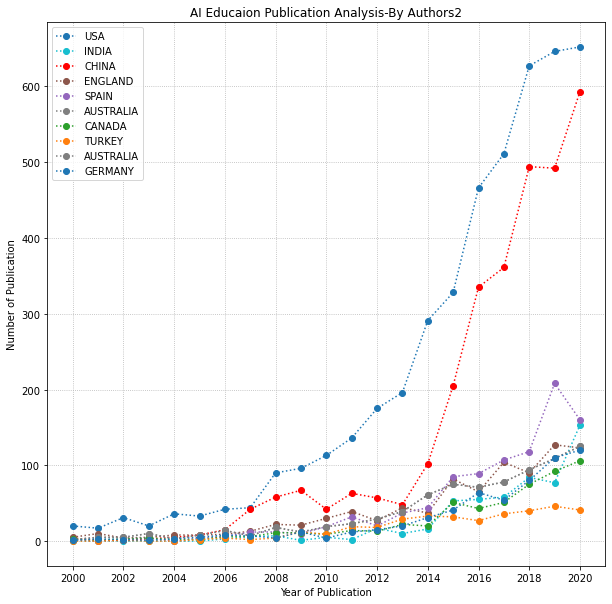

In [51]:
plot_y = {'GERMANY':germany,'TURKEY':turkey,'CANADA':canada,'AUSTRALIA':australia,
         'SPAIN':spain,'ENGLAND':england,'CHINA':china,'INDIA':india, 'USA':usa}
plt.figure(figsize=(10,10))
for item in top10[::-1]:
    pub_num = plot_y[item]
    plt.plot(years,pub_num, marker = 'o', linestyle=':', 
             color = color_code[str(item.upper())])
    plt.grid(linestyle=':')
    plt.title('AI Educaion Publication Analysis-By Authors2')
    plt.xlabel('Year of Publication')
    plt.ylabel('Number of Publication')
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))
    '''
    if item == 'USA':
        for i,v in enumerate(pub_year):
            plt.text(v, pub_num[i], str(pub_num[i]), fontsize = 9, color='black',
                     horizontalalignment='center', verticalalignment='bottom')
    '''
plt.legend(top10[::-1])

In [725]:
export = pd.DataFrame([germany,turkey,canada,australia,spain,england,china,india,usa], columns=[years], 
            index=['Germany','Turkey','Canada','Australia','Spain','England','China','India','USA'])
export
export.to_excel(excel_writer=r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Education_PUB_Analysis1.1.xlsx')

# Network Analysis
### Healthcare

In [734]:
df = pd.read_excel(r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Healthcare_PUB_CountrybyAuthors.xlsx')

In [737]:
years = list(set(df['Publication Year'].values.tolist()))
years.remove(2022)
years.remove(2021)
years

[1992,
 1996,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [795]:
a = ['Germany','USA']
b = ['USA','Germany']
a.sort(key= len), b
a ==b

True

In [806]:
from itertools import combinations
linkage = []
for year in years:
    for item in df[df['Publication Year'] == year]['Country by Authors']:
        target = item.split(';')
        while '' in target:
            target.remove('')
        if len(set(target))!=1:
            target = list(set(target))
            #print(target)
            for item in list(combinations(target,2)):
                temp = list(item)
                temp.sort(key=len)
                linkage.append(temp+[year])    

In [808]:
linkage

[['USA', 'Canada', 1996],
 ['Finland', 'Germany', 2001],
 ['Finland', 'Czech Republic', 2001],
 ['Poland', 'Finland', 2001],
 ['Germany', 'Czech Republic', 2001],
 ['Poland', 'Germany', 2001],
 ['Poland', 'Czech Republic', 2001],
 ['Brazil', 'England', 2004],
 ['Japan', 'China', 2005],
 ['USA', 'Germany', 2006],
 ['China', 'Canada', 2007],
 ['Egypt', 'Saudi Arabia', 2007],
 ['Egypt', 'China', 2007],
 ['USA', 'Egypt', 2007],
 ['Egypt', 'Canada', 2007],
 ['China', 'Saudi Arabia', 2007],
 ['USA', 'Saudi Arabia', 2007],
 ['Canada', 'Saudi Arabia', 2007],
 ['USA', 'China', 2007],
 ['China', 'Canada', 2007],
 ['USA', 'Canada', 2007],
 ['Greece', 'Canada', 2008],
 ['USA', 'Greece', 2008],
 ['Greece', 'Brazil', 2008],
 ['USA', 'Canada', 2008],
 ['Canada', 'Brazil', 2008],
 ['USA', 'Brazil', 2008],
 ['Indonesia', 'Singapore', 2009],
 ['China', 'Germany', 2009],
 ['China', 'Canada', 2009],
 ['USA', 'Canada', 2009],
 ['USA', 'China', 2009],
 ['Malaysia', 'Saudi Arabia', 2009],
 ['China', 'Canada'

In [810]:
network = pd.DataFrame(linkage, columns = ['Country1','Country2','Year'])

In [812]:
import networkx as nx

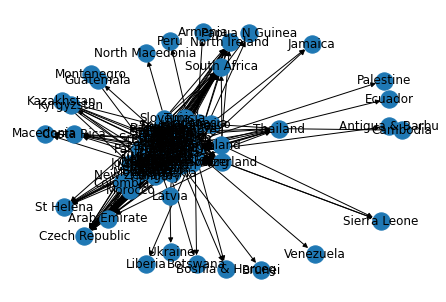

In [813]:
g = nx.from_pandas_edgelist(network,'Country1','Country2',create_using=nx.DiGraph())
nx.draw(g,with_labels=True)


# 기술키워드

In [3]:
df = pd.read_excel(r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Healthcare_PUB_CountrybyAuthors.xlsx')
#df = pd.read_excel(r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Education_PUB_CountrybyAuthors.xlsx')
df.dropna(subset=['Author Keywords'],inplace = True)

In [14]:
keywordnum = 15

In [15]:
top10 = ['Germany','Saudi Arabia','Canada','Australia','Italy','South Korea','England','China','India','USA']
keyword_health = pd.DataFrame()
if keywordnum == 20:
    keywordnum == 21
for country in top10[::-1]:
    keywords =[]
    keywords_dic={}
    for line in df[df['Country'] ==country]['Author Keywords']:
        for item in line.split(';'):
            target = item.lower().replace(' ','')
            keywords.append(target)
            if target == 'internetofthings(iot)':
                target = 'internetofthings'
            
            if target not in keywords_dic.keys():
                keywords_dic[target] = 1
            elif target in keywords_dic.keys():
                keywords_dic[target] += 1
            else:
                print('Error at keyword:' + str(target))
    keyword_health[country] = sorted(keywords_dic.items(), key = operator.itemgetter(1), reverse = True)[0:keywordnum]
    
colors = ['C0','C1','C2','C7','C4','C5','C6','r','C8','C9','C0']
color_code = {}
for i in range(10):
    color_code[top10[i]] = colors[i]
for country in top10[::-1]:
    x = []
    y = []
    for line in keyword_health[country][0:keywordnum]:
        x.append(line[0])
        y.append(line[1])
    plt.figure(figsize=(10,10))
    plt.bar(x,y, color = color_code[country])
    plt.title('{} Keywords'.format(country))
    for i,v in enumerate(x):
        plt.text(v, y[i], str(y[i]), fontsize = 9, color='black',
                 horizontalalignment='center',verticalalignment='bottom')
    ax=plt.subplot(1,1,1)
    for label in ax.xaxis.get_ticklabels() :
        label.set_rotation(90)
    plt.savefig('{}_{}.png'.format(country,keywordnum), dpi=300)
    plt.clf()

<ipython-input-15-7f1bf836f505>:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(1,1,1)


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [11]:
keyword_health.to_excel(excel_writer = r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Healthcare_PUB_Keywords.xlsx')

In [17]:
df = pd.read_excel(r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Education_PUB_CountrybyAuthors.xlsx')
df.dropna(subset=['Author Keywords'],inplace = True)

In [23]:
keywordnum = 5

In [30]:
top10 = ['Japan','Turkey','Canada','Germany','India','Australia','England','Spain','China','USA']
keyword_education = pd.DataFrame()
for country in top10[::-1]:
    keywords =[]
    keywords_dic={}
    for line in df[df['Country'] ==country]['Author Keywords']:
        for item in line.split(';'):
            target = item.lower().replace(' ','')
            keywords.append(target)
            if target not in keywords_dic.keys():
                keywords_dic[target] = 1
            elif target in keywords_dic.keys():
                keywords_dic[target] += 1
            else:
                print('Error at keyword:' + str(target))
    keyword_education[country] = sorted(keywords_dic.items(), key = operator.itemgetter(1), reverse = True)[0:keywordnum]

colors = ['C9','C1','C2','C7','C4','C5','C6','C8','r','C0']
color_code = {}
for i in range(10):
    color_code[top10[i]] = colors[i]
for country in top10[::-1]:
    x = []
    y = []
    for line in keyword_education[country][0:keywordnum]:
        x.append(line[0])
        y.append(line[1])
    plt.figure(figsize=(10,12))
    plt.bar(x,y, color = color_code[country])
    plt.title('{} Keywords'.format(country))
    for i,v in enumerate(x):
        plt.text(v, y[i], str(y[i]), fontsize = 9, color='black',
                 horizontalalignment='center',verticalalignment='bottom')
    ax=plt.subplot(1,1,1)
    for label in ax.xaxis.get_ticklabels() :
        label.set_rotation(90)
    plt.savefig('{}_{}.png'.format(country,keywordnum), dpi=300)
    plt.clf()

<ipython-input-30-e65d2dce9174>:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(1,1,1)


<Figure size 720x864 with 0 Axes>

<Figure size 720x864 with 0 Axes>

<Figure size 720x864 with 0 Axes>

<Figure size 720x864 with 0 Axes>

<Figure size 720x864 with 0 Axes>

<Figure size 720x864 with 0 Axes>

<Figure size 720x864 with 0 Axes>

<Figure size 720x864 with 0 Axes>

<Figure size 720x864 with 0 Axes>

<Figure size 720x864 with 0 Axes>

In [68]:
keyword_education.to_excel(excel_writer = r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Education_PUB_Keywords.xlsx')

In [267]:
df = pd.read_excel(r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Education_PUB_CountrybyAuthors.xlsx', index_col = 0)
df.dropna(subset=['Author Keywords'],inplace = True)

In [268]:
#Education top10 keywords
us10 =['machinelearning','education','bigdata','artificialintelligence','deeplearning',
       'highereducation','professionaldevelopment','intelligenttutoringsystems','assessment',
      'activelearning']
china10 = ['bigdata','machinelearning','deeplearning','artificialintelligence','datamining',
        'neuralnetwork','collegestudents','learning','bpneuralnetwork','education']

In [269]:
row = 0
row10 = 0
keywordlist = []
keywordlist10 = []
for line in df[df['Country'] == 'USA']['Author Keywords']:
    temp = []
    for item in line.split(';'):
        target = item.replace(' ','').lower()
        keywordlist.append([row,target])
        if target in us10:
            temp.append(target)
    if len(temp) > 1:
        for word in temp:
            keywordlist10.append([row10,word])
        row10 +=1
    row +=1
#pd.DataFrame(keywordlist, columns=['id','keyword']).to_excel(excel_writer = r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Education_PUB_Keywordmap_US.xlsx')
#pd.DataFrame(keywordlist10, columns=['id','keyword']).to_excel(excel_writer = r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Education_PUB_Top10Keywordmap_US.xlsx')

In [270]:
row = 0
row10 = 0
keywordlist = []
keywordlist10 = []
for line in df[df['Country'] == 'China']['Author Keywords']:
    temp = []
    for item in line.split(';'):
        target = item.replace(' ','').lower()
        keywordlist.append([row,target])
        if target in china10:
            temp.append(target)
    if len(temp) > 1:
        for word in temp:
            keywordlist10.append([row10,word])
        row10 +=1
    row +=1
#pd.DataFrame(keywordlist, columns=['id','keyword']).to_excel(excel_writer = r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Education_PUB_Keywordmap_China.xlsx')
#pd.DataFrame(keywordlist10, columns=['id','keyword']).to_excel(excel_writer = r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Education_PUB_Top10Keywordmap_China.xlsx')

# Keyword Network Data Generation

In [133]:
df = pd.read_excel(r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Healthcare_PUB_CountrybyAuthors.xlsx', index_col = 0)
df.dropna(subset=['Author Keywords'],inplace = True)

In [132]:
#Healthcare top10 keywords
us10 =['machinelearning','artificialintelligence','healthcare','deeplearning','bigdata',
       'electronichealthrecords','naturallanguageprocessing','datamining','bigdataanalytics',
       'covid-19','neuralnetworks','classification','precisionmedicine','internetofthings',
       'cloudcomputing','datascience','prediction','ethics','analytics','breastcancer']
china10 = ['deeplearning','healthcare','machinelearning','bigdata','cloudcomputing',
        'internetofthings','artificialintelligence','datamining','diseases','smarthealthcare',
          'china','featureselection','neuralnetwork','internetofthings(iot)','featureextraction',
           'covid-19','neuralnetworks','computationalmodeling','privacy','predictivemodels']

In [134]:
row = 0
row10 = 0
keywordlist = []
keywordlist10 = []
for line in df[df['Country'] == 'USA']['Author Keywords']:
    temp = []
    for item in line.split(';'):
        target = item.replace(' ','').lower()
        keywordlist.append([row,target])
        if target in us10:
            temp.append(target)
    if len(temp) > 1:
        for word in temp:
            keywordlist10.append([row10,word])
        row10 +=1
    row +=1
#pd.DataFrame(keywordlist, columns=['id','keyword']).to_excel(excel_writer = r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Healthcare_PUB_Keywordmap_US.xlsx')
#pd.DataFrame(keywordlist10, columns=['id','keyword']).to_excel(excel_writer = r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Healthcare_PUB_Top10Keywordmap_US.xlsx')

In [ ]:
keywordlist

In [275]:
row = 0
row10 = 0
keywordlist = []
keywordlist10 = []
for line in df[df['Country'] == 'China']['Author Keywords']:
    temp = []
    for item in line.split(';'):
        target = item.replace(' ','').lower()
        keywordlist.append([row,target])
        if target in china10:
            temp.append(target)
    if len(temp) > 1:
        for word in temp:
            keywordlist10.append([row10,word])
        row10 +=1
    row +=1
#pd.DataFrame(keywordlist, columns=['id','keyword']).to_excel(excel_writer = r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Healthcare_PUB_Keywordmap_China.xlsx')
#pd.DataFrame(keywordlist10, columns=['id','keyword']).to_excel(excel_writer = r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Healthcare_PUB_Top10Keywordmap_China.xlsx')

# Affiliation Analysis

In [112]:
df = pd.read_excel(r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Healthcare_PUB_CountrybyAuthors.xlsx')
df.dropna(subset=['Addresses'],inplace = True)

In [113]:
topnum = 15

In [114]:
#University
affiliation = {}
for line in df['Addresses']:
    for item in re.findall('] [A-za-z &]*,',line):
        target = item.lstrip('] ').rstrip(',')
        if target not in affiliation.keys():
            affiliation[target] = 1
        else:
            affiliation[target] +=1
plotdata = sorted(affiliation.items(), key = operator.itemgetter(1), reverse = True)[0:topnum]

<ipython-input-115-159f7e0b12ea>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(1,1,1)


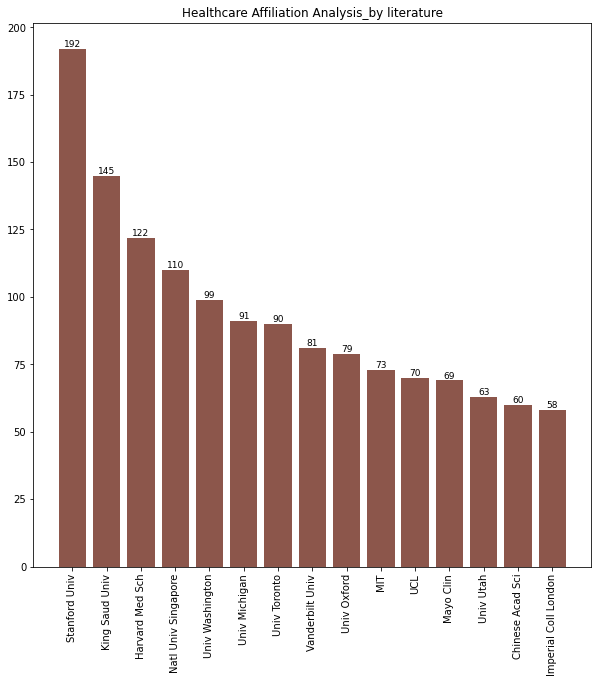

In [115]:
for_saving = []
x = []
y = []
for a,b in plotdata:
    x.append(a)
    y.append(b)
plt.figure(figsize=(10,10))
plt.bar(x,y, color = 'C5')
plt.title('Healthcare Affiliation Analysis_by literature')
ax=plt.subplot(1,1,1)
for i,v in enumerate(x):
    plt.text(v, y[i], str(y[i]), fontsize = 9, color='black',
             horizontalalignment='center',verticalalignment='bottom')
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(90)
for_saving.append(['Health_lit',x,y])

In [116]:
#Person*University
plotdata = []
affiliation = {}
for line in df['Addresses']:
    for people, item in zip(re.findall(r'\[[\w ;,.]+\]',line),re.findall('] [A-za-z &]*,',line)):
        person = len(people.split(';'))
        target = item.lstrip('] ').rstrip(',')
        if target not in affiliation.keys():
            affiliation[target] = person
        else:
            affiliation[target] += person
plotdata = sorted(affiliation.items(), key = operator.itemgetter(1), reverse = True)[0:topnum]

<ipython-input-117-7334e3c8a8c1>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(1,1,1)


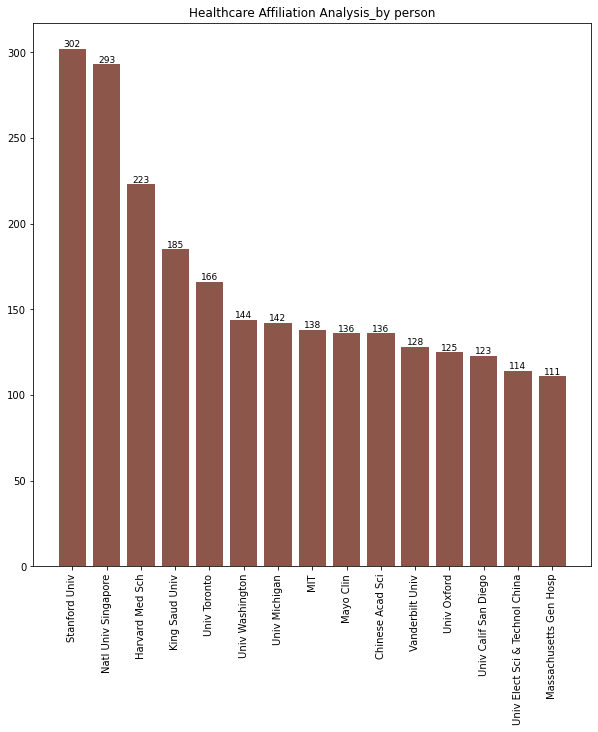

In [117]:
x = []
y = []
for a,b in plotdata:
    x.append(a)
    y.append(b)
plt.figure(figsize=(10,10))
plt.bar(x,y, color = 'C5')
plt.title('Healthcare Affiliation Analysis_by person')
ax=plt.subplot(1,1,1)
for i,v in enumerate(x):
    plt.text(v, y[i], str(y[i]), fontsize = 9, color='black',
             horizontalalignment='center',verticalalignment='bottom')
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(90)
for_saving.append(['Health_person',x,y])

In [118]:
pd.DataFrame(for_saving)

,0,1,2
0,Health_lit,"[Stanford Univ, King Saud Univ, Harvard Med Sc...","[192, 145, 122, 110, 99, 91, 90, 81, 79, 73, 7..."
1,Health_person,"[Stanford Univ, Natl Univ Singapore, Harvard M...","[302, 293, 223, 185, 166, 144, 142, 138, 136, ..."


In [119]:
df = pd.read_excel(r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Education_PUB_CountrybyAuthors.xlsx')
df.dropna(subset=['Addresses'],inplace = True)

In [120]:
#University
affiliation = {}
for line in df['Addresses']:
    for item in re.findall('] [A-za-z &]*,',line):
        target = item.lstrip('] ').rstrip(',')
        if target not in affiliation.keys():
            affiliation[target] = 1
        else:
            affiliation[target] +=1
plotdata = sorted(affiliation.items(), key = operator.itemgetter(1), reverse = True)[0:topnum]

<ipython-input-121-5caf287ff856>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(1,1,1)


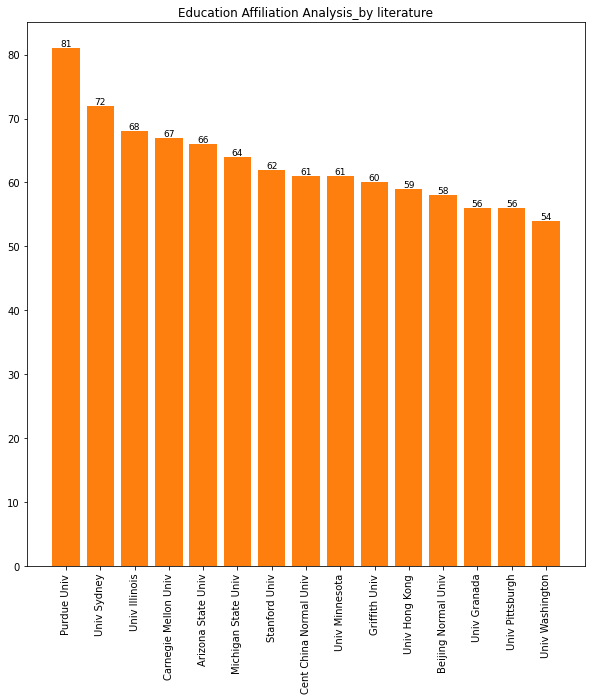

In [121]:
x = []
y = []
for a,b in plotdata:
    x.append(a)
    y.append(b)
plt.figure(figsize=(10,10))
plt.bar(x,y, color = 'C1')
plt.title('Education Affiliation Analysis_by literature')
ax=plt.subplot(1,1,1)
for i,v in enumerate(x):
    plt.text(v, y[i], str(y[i]), fontsize = 9, color='black',
             horizontalalignment='center',verticalalignment='bottom')
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(90)
for_saving.append(['Edu_lit',x,y])

In [122]:
#Person*University
plotdata = []
affiliation = {}
for line in df['Addresses']:
    for people, item in zip(re.findall(r'\[[\w ;,.]+\]',line),re.findall('] [A-za-z &]*,',line)):
        person = len(people.split(';'))
        target = item.lstrip('] ').rstrip(',')
        if target not in affiliation.keys():
            affiliation[target] = person
        else:
            affiliation[target] += person
plotdata = sorted(affiliation.items(), key = operator.itemgetter(1), reverse = True)[0:topnum]

<ipython-input-123-d9a72712d720>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(1,1,1)


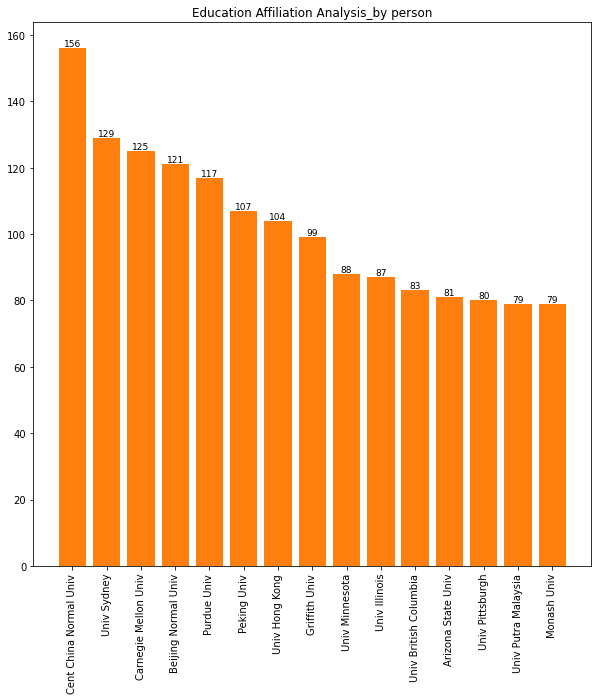

In [123]:
x = []
y = []
for a,b in plotdata:
    x.append(a)
    y.append(b)
plt.figure(figsize=(10,10))
plt.bar(x,y, color = 'C1')
plt.title('Education Affiliation Analysis_by person')
ax=plt.subplot(1,1,1)
for i,v in enumerate(x):
    plt.text(v, y[i], str(y[i]), fontsize = 9, color='black',
             horizontalalignment='center',verticalalignment='bottom')
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(90)
for_saving.append(['Edu_person',x,y])

In [124]:
pd.DataFrame(for_saving,columns = ['Category','Affiliation','Count']).to_excel(excel_writer=r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_PUB_Affiliation_top{}.xlsx'.format(topnum))

# Backward Citation Crawling

In [168]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time
import pandas as pd
import os
import random
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException

In [2]:
df = pd.read_excel(r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Healthcare_PUB.xlsx')

In [3]:
df.shape

(7528, 68)

In [172]:
driverpath = r'C:\Users\Yunseok Choi\Downloads\chromedriver_win32\chromedriver.exe'

In [173]:
def selenium_set():
    global driver
    global wait
    driver = webdriver.Chrome(driverpath)
    
    driver.get('https://www.webofscience.com/wos/woscc/full-record/WOS:000390851500161')
    time.sleep(7)
    options = Options()
    driver.set_window_size(1400, 1000)
    driver.find_element_by_id('pendo-close-guide-8fdced48').click()
    time.sleep(random.uniform(1,2))
    driver.find_element_by_xpath('//*[@id="pendo-button-6fae6924"]').click()
    time.sleep(random.uniform(1,2))
    driver.find_element_by_xpath('//*[@id="pendo-button-26350b95"]').click()
    time.sleep(random.uniform(1,2))
    driver.find_element_by_xpath('//*[@id="FRMiniCrlTa-viewCitedRefLink"]').click()
    time.sleep(2)
    driver.find_element_by_id('pendo-button-506b4382').click() 

In [174]:
def selenium_reset():
    global driver
    global wait
    driver.close()
    driver = webdriver.Chrome(driverpath)
    driver.get('https://www.webofscience.com/wos/woscc/full-record/WOS:000390851500161')
    time.sleep(7)
    options = Options()
    driver.set_window_size(1400, 1000)
    driver.find_element_by_id('pendo-close-guide-8fdced48').click()
    time.sleep(random.uniform(1,2))
    driver.find_element_by_xpath('//*[@id="pendo-button-6fae6924"]').click()
    time.sleep(random.uniform(1,2))
    driver.find_element_by_xpath('//*[@id="pendo-button-26350b95"]').click()
    time.sleep(random.uniform(1,2))
    driver.find_element_by_xpath('//*[@id="FRMiniCrlTa-viewCitedRefLink"]').click()
    time.sleep(5)
    driver.find_element_by_id('pendo-button-506b4382').click() 

In [175]:
def selenium_search_back():
    global driver
    global wait
    global process
    global i
    url = 'https://www.webofscience.com/wos/woscc/full-record/{}'.format(df['UT (Unique WOS ID)'][i])
    driver.get(url)
    wait = WebDriverWait(driver, 5)
    time.sleep(random.uniform(2,4))
    wait.until(EC.visibility_of_element_located((By.ID, 'FullRRPTa-wos-citation-network-refCountLink')))
    
    soup = BeautifulSoup(driver.page_source)
    citation = soup.select('div.large-link-number')[-1].text
    return citation

In [176]:
def selenium_search_forward():
    global driver
    global wait
    global process
    global i
    url = 'https://www.webofscience.com/wos/woscc/full-record/{}'.format(df['UT (Unique WOS ID)'][i])
    driver.get(url)
    driver.implicitly_wait(5)
    
    time.sleep(random.uniform(3,4))
    
    soup = BeautifulSoup(driver.page_source)
    if soup.select('div.esi-links-div>div.ng-star-inserted>a') != []:
        citation = soup.select('div.esi-links-div>div.ng-star-inserted>a')[0].text
    else:
        citation = 0
    return citation

In [177]:
def selenium_download_back():
    global driver
    global wait
    global process
    global i
    
    time.sleep(random.uniform(1,2))
    driver.find_element_by_xpath('//*[@id="FRMiniCrlTa-viewCitedRefLink"]').click()
    time.sleep(random.uniform(0.5,2))    
    driver.find_element_by_xpath('//*[@id="snRecListTop"]/app-export-menu/div/button').click()
    time.sleep(random.uniform(0.5,2))
    driver.find_element_by_xpath('//*[@id="exportToExcelButton"]').click()
    time.sleep(random.uniform(0.5,2))
    driver.find_element_by_xpath('/html/body/app-wos/div/div/main/app-input-route/app-export-overlay/div/div[3]/div[2]/app-export-out-details/div/div[2]/div/div[1]/wos-select/button').click()
    time.sleep(random.uniform(0.5,2))
    driver.find_element_by_xpath('//*[@id="global-select"]/div/div[2]/div[3]').click()
    time.sleep(random.uniform(0.5,2))
    driver.find_element_by_xpath('/html/body/app-wos/div/div/main/app-input-route/app-export-overlay/div/div[3]/div[2]/app-export-out-details/div/div[2]/div/div[2]/button[1]').click()

In [178]:
def selenium_download_forward():
    global driver
    global wait
    global process
    global i
    
    
    time.sleep(random.uniform(1,2))
    driver.find_element_by_id('FullRRPTa-wos-citation-network-times-cited-count-link-{}'.format(citation_num)).click()
    #driver.implicitly_wait(5)
    time.sleep(random.uniform(0.5,2))
    WebDriverWait(driver,5).until(EC.visibility_of_element_located((By.CLASS_NAME, 'mat-checkbox-layout')))
    driver.find_element_by_xpath('//*[@id="snRecListTop"]/app-export-menu/div/button').click()
    time.sleep(random.uniform(0.5,2))
    driver.find_element_by_xpath('//*[@id="exportToExcelButton"]').click()
    time.sleep(random.uniform(0.5,2))
    driver.find_element_by_xpath('/html/body/app-wos/div/div/main/app-input-route/app-export-overlay/div/div[3]/div[2]/app-export-out-details/div/div[2]/div/div[1]/wos-select/button').click()
    time.sleep(random.uniform(0.5,2))
    driver.find_element_by_xpath('//*[@id="global-select"]/div/div[2]/div[3]').click()
    time.sleep(random.uniform(0.5,2))
    driver.find_element_by_xpath('/html/body/app-wos/div/div/main/app-input-route/app-export-overlay/div/div[3]/div[2]/app-export-out-details/div/div[2]/div/div[2]/button[1]').click()

In [179]:
def selenium_re_download():
    global driver
    global wait
    global process
    driver.find_element_by_xpath('/html/body/app-wos/div/div/main/app-input-route/app-export-overlay/div/div[3]/div[2]/app-export-out-details/div/div[2]/div/div[2]/button[2]').click()
    time.sleep(random.uniform(0.5,2))
    driver.find_element_by_xpath('//*[@id="snRecListTop"]/app-export-menu/div/button').click()
    time.sleep(random.uniform(0.5,2))
    driver.find_element_by_xpath('//*[@id="exportToExcelButton"]').click()
    time.sleep(random.uniform(0.5,2))
    driver.find_element_by_xpath('/html/body/app-wos/div/div/main/app-input-route/app-export-overlay/div/div[3]/div[2]/app-export-out-details/div/div[2]/div/div[1]/wos-select/button').click()
    time.sleep(random.uniform(0.5,2))
    driver.find_element_by_xpath('//*[@id="global-select"]/div/div[2]/div[3]').click()
    time.sleep(random.uniform(0.5,2))
    driver.find_element_by_xpath('/html/body/app-wos/div/div/main/app-input-route/app-export-overlay/div/div[3]/div[2]/app-export-out-details/div/div[2]/div/div[2]/button[1]').click()

In [104]:
process = 6931

In [103]:
df[df['UT (Unique WOS ID)'] == 'WOS:000575321600120']

,Unnamed: 0,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,...,WoS Categories,Research Areas,IDS Number,UT (Unique WOS ID),Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,Unnamed: 67
6931,864,B,"McGill, MM; Decker, A; McKlin, T; Haynie, K",NaN,NaN,Assoc Comp Machinery,"McGill, Monica M.; Decker, Adrienne; McKlin, T...",NaN,NaN,A Gap Analysis of Noncognitive Constructs in E...,...,"Computer Science, Theory & Methods; Education,...",Computer Science; Education & Educational Rese...,BQ1EJ,WOS:000575321600120,NaN,Bronze,NaN,NaN,2021-08-19,NaN


In [129]:
selenium_reset()

In [14]:
selenium_set()

In [105]:
for i in range(process, len(df['UT (Unique WOS ID)'])):
    try:
        citation_num = selenium_search_back()
        if citation_num != "0":
            selenium_download()
        
            temp = 0
            rep = 0
            while 'savedrecs.xls' not in os.listdir('c:/users/yunseok Choi/downloads'):
                time.sleep(5)
                temp += 1

                if temp == 5:
                    selenium_re_download_back()
                    temp = 0
                    rep +=1
                if rep == 2:
                    selenium_reset()
                    selenium_download_back()
            if rep == 3:
                break

            file_oldname = os.path.join("c:/users/yunseok Choi/downloads", "savedrecs.xls")
            file_newname_newfile = os.path.join("c:/users/yunseok choi/downloads", "{}.xls".format(df['UT (Unique WOS ID)'][i].split(':')[-1]))
            os.rename(file_oldname, file_newname_newfile)

            process +=1
            print(df['UT (Unique WOS ID)'][i])
        else:
            print('{} has {} citation'.format(df['UT (Unique WOS ID)'][i],citation_num))
    except TimeoutException as ex:
        print('Element non-location')
        selenium_reset()
        pass
    
    except FileExistsError as ex:
        process +=1
        os.remove(os.path.join("c:/users/yunseok Choi/downloads", "savedrecs.xls"))
        print(ex)

NameError: name 'selenium_download' is not defined

Cmulating backward citation data

In [3]:
import pandas as pd
import os

In [30]:
path = r'C:/Users/Yunseok Choi/Downloads/AI Healthcare'
filelist = os.listdir(path)
for i in range(len(filelist)):
    if i == 0:
        temp = pd.read_excel(path+'/'+os.listdir(path)[i])
        temp['Unnamed: 67'] = ('WOS:'+os.listdir(path)[i].split('.')[0])
    else:
        new =  pd.read_excel(path+'/'+os.listdir(path)[i])
        new['Unnamed: 67'] = ('WOS:'+os.listdir(path)[i].split('.')[0])
        temp = pd.concat([temp, new])
        if i%100 == 0:
            print(i)
temp.rename(columns = {'Unnamed: 67' : 'CIted By'}, inplace = True)
temp.to_excel(path + '/AI_Healthcare_backwardcitation.xlsx')

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300


In [37]:
path = r'C:/Users/Yunseok Choi/Downloads/AI Education'
filelist = os.listdir(path)
for i in range(len(filelist)):
    if i == 0:
        temp = pd.read_excel(path+'/'+os.listdir(path)[i])
        temp['Unnamed: 67'] = ('WOS:'+os.listdir(path)[i].split('.')[0])
    else:
        new =  pd.read_excel(path+'/'+os.listdir(path)[i])
        new['Unnamed: 67'] = ('WOS:'+os.listdir(path)[i].split('.')[0])
        temp = pd.concat([temp, new])
        if i%100 == 0:
            print('{} out of {}.'.format(i, len(filelist)))
temp.rename(columns = {'Unnamed: 67' : 'CIted By'}, inplace = True)
temp.to_excel(path + '/AI_Education_backwardcitation.xlsx')

100 out of 12645.
200 out of 12645.
300 out of 12645.
400 out of 12645.
500 out of 12645.
600 out of 12645.
700 out of 12645.
800 out of 12645.
900 out of 12645.
1000 out of 12645.
1100 out of 12645.
1200 out of 12645.
1300 out of 12645.
1400 out of 12645.
1500 out of 12645.
1600 out of 12645.
1700 out of 12645.
1800 out of 12645.
1900 out of 12645.
2000 out of 12645.
2100 out of 12645.
2200 out of 12645.
2300 out of 12645.
2400 out of 12645.
2500 out of 12645.
2600 out of 12645.
2700 out of 12645.
2800 out of 12645.
2900 out of 12645.
3000 out of 12645.
3100 out of 12645.
3200 out of 12645.
3300 out of 12645.
3400 out of 12645.
3500 out of 12645.
3600 out of 12645.
3700 out of 12645.
3800 out of 12645.
3900 out of 12645.
4000 out of 12645.
4100 out of 12645.
4200 out of 12645.
4300 out of 12645.
4400 out of 12645.
4500 out of 12645.
4600 out of 12645.
4700 out of 12645.
4800 out of 12645.
4900 out of 12645.
5000 out of 12645.
5100 out of 12645.
5200 out of 12645.
5300 out of 12645.
54

In [51]:
data = pd.read_excel(path + '/AI_Education_backwardcitation.xlsx')

In [57]:
data['CIted By'].unique()

array(['WOS:000071100700002', 'WOS:000071576600001',
       'WOS:000071576600004', ..., 'WOS:A1997YD36200007',
       'WOS:A1997YG49600004', 'WOS:AI_Education_PUB'], dtype=object)

In [62]:
filelist[-10].split('.')

['A1997XP61500001', 'xls']

In [60]:
path = r'C:/Users/Yunseok Choi/Downloads/AI Education'
filelist = os.listdir(path)
len(filelist)
for i in range(len(filelist)):
    print(filelist[i])

000071061200036.xls
000071100700002.xls
000071576600001.xls
000071576600004.xls
000071611500009.xls
000071863900023.xls
000072192100009.xls
000072231400003.xls
000072345400005.xls
000072464300008.xls
000073302400003.xls
000073426700009.xls
000073457200001.xls
000073477700005.xls
000073947800011.xls
000074291100002.xls
000074399400009.xls
000074778300009.xls
000075008800012.xls
000075298800002.xls
000076002900002.xls
000076120000009.xls
000076322700001.xls
000076967200006.xls
000076989900003.xls
000077231600011.xls
000077402000002.xls
000077638200002.xls
000077996500012.xls
000078207700005.xls
000078561500004.xls
000078770600006.xls
000078947400003.xls
000079161800024.xls
000079321400003.xls
000079496700005.xls
000079628300052.xls
000079630400095.xls
000079685200018.xls
000079690700894.xls
000079708900709.xls
000079795600006.xls
000079884900003.xls
000079884900015.xls
000079974400019.xls
000080143100003.xls
000080419900001.xls
000080739700002.xls
000080923600007.xls
000080951700008.xls


000309064200105.xls
000309224400014.xls
000309320800001.xls
000309322900020.xls
000309387300008.xls
000309406701134.xls
000309530600026.xls
000309530600031.xls
000309531600038.xls
000309590100010.xls
000309590700038.xls
000309596700047.xls
000309596700141.xls
000309656200003.xls
000309656200004.xls
000309741900003.xls
000309841700005.xls
000309920300017.xls
000309948000010.xls
000310150400004.xls
000310173400124.xls
000310174600012.xls
000310175100049.xls
000310186700084.xls
000310232600004.xls
000310244700029.xls
000310309100002.xls
000310338800029.xls
000310353000155.xls
000310369600003.xls
000310400000004.xls
000310434700025.xls
000310488400009.xls
000310490800071.xls
000310669200071.xls
000310717900010.xls
000310724600015.xls
000310724600017.xls
000310724600022.xls
000310801000001.xls
000310801700009.xls
000310815000014.xls
000310856800063.xls
000310860300004.xls
000310861600011.xls
000310896300007.xls
000310958500004.xls
000311058400116.xls
000311204300010.xls
000311506200014.xls


000407727300002.xls
000407758500004.xls
000407758500005.xls
000407792800005.xls
000407793800012.xls
000407817400009.xls
000407819000007.xls
000408019900002.xls
000408036500006.xls
000408038900010.xls
000408104000003.xls
000408131000035.xls
000408164000008.xls
000408187500008.xls
000408271500035.xls
000408355800019.xls
000408371500005.xls
000408377200018.xls
000408458300004.xls
000408526800003.xls
000408566700004.xls
000408590500001.xls
000408593300001.xls
000408611100001.xls
000408616900001.xls
000408660200008.xls
000408707400001.xls
000408727700004.xls
000408733800002.xls
000408778600002.xls
000408789000007.xls
000408860100009.xls
000408973900003.xls
000409024900008.xls
000409067500085.xls
000409067500113.xls
000409075000006.xls
000409176700001.xls
000409233200006.xls
000409235700009.xls
000409259100013.xls
000409264600004.xls
000409282800076.xls
000409298100003.xls
000409328900001.xls
000409330700015.xls
000409330700019.xls
000409348100001.xls
000409361700002.xls
000409368100003.xls


000491356003076.xls
000491356003114.xls
000491356003134.xls
000491356004015.xls
000491356004080.xls
000491423000001.xls
000491493000028.xls
000491493000029.xls
000491493300157.xls
000491498400005.xls
000491539600078.xls
000491616300001.xls
000491996704008.xls
000492017200004.xls
000492038200123.xls
000492038200338.xls
000492154300001.xls
000492159000006.xls
000492182400002.xls
000492190800018.xls
000492311100019.xls
000492348200001.xls
000492372000050.xls
000492401100001.xls
000492471000003.xls
000492538900001.xls
000492543300001.xls
000492558000001.xls
000492605300078.xls
000492605300087.xls
000492605300141.xls
000492725900001.xls
000492756300009.xls
000492824200004.xls
000492834500007.xls
000492847700001.xls
000492847700009.xls
000492886500001.xls
000492889800023.xls
000492893500001.xls
000492923700001.xls
000492926100001.xls
000492932800001.xls
000492975800006.xls
000492996100029.xls
000493000200001.xls
000493006600013.xls
000493045400016.xls
000493048100065.xls
000493048100099.xls


A1996UD88300012.xls
A1996UE39400003.xls
A1996UJ42300007.xls
A1996UJ67900008.xls
A1996UR62500001.xls
A1996UX94700013.xls
A1996UY54900006.xls
A1996UZ35500003.xls
A1996VB09700006.xls
A1996VB83400005.xls
A1996VD21100009.xls
A1996VD53900004.xls
A1996VF08400001.xls
A1996VJ10600015.xls
A1996VK27500004.xls
A1996VL88400002.xls
A1996VM01400008.xls
A1996VN33400003.xls
A1996VP33200022.xls
A1996VP40000002.xls
A1996VT78500008.xls
A1996VU26100012.xls
A1996VY39500004.xls
A1996WB39300015.xls
A1996WD72600001.xls
A1996WE14500004.xls
A1997WK65900006.xls
A1997WP30700006.xls
A1997WP37100008.xls
A1997WT91400024.xls
A1997WU73500001.xls
A1997WV07200008.xls
A1997XA58500031.xls
A1997XB64200006.xls
A1997XE77700013.xls
A1997XN14700003.xls
A1997XP41700006.xls
A1997XP41700007.xls
A1997XP49500001.xls
A1997XP61500001.xls
A1997XQ27100005.xls
A1997XT45200050.xls
A1997XY36300029.xls
A1997XY91300002.xls
A1997YD36200007.xls
A1997YD68500018.xls
A1997YG49600004.xls
AI_Education_backwardcitation.xlsx
AI_Education_PUB.xlsx


In [43]:
path = r'C:/Users/Yunseok Choi/Downloads/AI Healthcare'
filelist = os.listdir(path)
len(filelist)

7378

Forward Citation

In [88]:
df = pd.read_excel(r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Education_PUB.xlsx')

In [73]:
selenium_set()

In [78]:
selenium_reset()

In [116]:
process = 12876

In [115]:
df[df['UT (Unique WOS ID)'] == 'WOS:000303363500281']

,Unnamed: 0,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,...,WoS Categories,Research Areas,IDS Number,UT (Unique WOS ID),Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,Unnamed: 67
12875,808,S,"Zhang, G; Yin, J; Cheng, LL; Wang, CR",NaN,"Xiong, JQ",NaN,"Zhang, Gang; Yin, Jian; Cheng, Liang-Lun; Wang...",NaN,NaN,Machine Learning based Teaching Quality Evalua...,...,"Education, Scientific Disciplines; Materials S...",Education & Educational Research; Materials Sc...,BZY37,WOS:000303363500281,NaN,NaN,NaN,NaN,2021-08-19,NaN


In [118]:
for i in range(process, len(df['UT (Unique WOS ID)'])):
    try:
        citation_num = selenium_search_forward()
        if citation_num != 0:
            citation_num = citation_num.replace(' ','')
            selenium_download_forward()
        
            temp = 0
            rep = 0
            while 'savedrecs.xls' not in os.listdir('c:/users/yunseok Choi/downloads'):
                time.sleep(5)
                temp += 1

                if temp == 5:
                    selenium_re_download()
                    temp = 0
                    rep +=1
                if rep == 2:
                    selenium_reset()
                    selenium_search_forward()
                    selenium_download_forward()
            if rep == 3:
                raise TimeoutException

            file_oldname = os.path.join("c:/users/yunseok Choi/downloads", "savedrecs.xls")
            file_newname_newfile = os.path.join("c:/users/yunseok choi/downloads", "{}.xls".format(df['UT (Unique WOS ID)'][i].split(':')[-1]))
            os.rename(file_oldname, file_newname_newfile)

            process +=1
            print(df['UT (Unique WOS ID)'][i])
        else:
            print('{} has {} citation'.format(df['UT (Unique WOS ID)'][i],citation_num))
    except TimeoutException as ex:
        print('Element non-location')
        selenium_reset()
        pass
    
    except NoSuchElementException as ex:
        print('No Such Element')
        selenium_reset()
        pass
    
    except FileExistsError as ex:
        process +=1
        os.remove(os.path.join("c:/users/yunseok Choi/downloads", "savedrecs.xls"))
        print(ex)

WOS:000453244100001
WOS:000454268900022 has 0 citation
WOS:000508745700030
WOS:000418203200068
WOS:000618076700093 has 0 citation
WOS:000487066000013
WOS:000518895100007 has 0 citation
WOS:000425853000032 has 0 citation
WOS:000455058400155 has 0 citation
WOS:000452912200025 has 0 citation
WOS:000473721900023
WOS:000339720600010
WOS:000275898100128 has 0 citation
WOS:000350254900003
WOS:000288683300007 has 0 citation
WOS:000351043800015 has 0 citation
WOS:000632691600001
WOS:000591809300005 has 0 citation
WOS:000596226700002
WOS:000411334900053
WOS:000257626300001
WOS:000263817100117
WOS:000534521200001
WOS:000517984800057 has 0 citation
WOS:000637286700153 has 0 citation
WOS:000398726300212 has 0 citation
WOS:000558628900037
WOS:000257699300003 has 0 citation
WOS:000455606800009
WOS:000600122900009 has 0 citation
WOS:000457127300105
WOS:000569044900003
WOS:000629903800001
WOS:000455329700147 has 0 citation
WOS:000557295304004
WOS:000620344900002 has 0 citation
WOS:000494762800069 has 0

### 다운로드한 데이터 합치기

In [119]:
import pandas as pd
import os

In [271]:
path = r'C:/Users/Yunseok Choi/Downloads/AI Healthcare_forward'
filelist = os.listdir(path)
for i in range(len(filelist)):
    try :
        if i == 0:
            temp = pd.read_excel(path+'/'+filelist[i])
            temp['Unnamed: 67'] = ('WOS:'+filelist[i].split('.')[0])
            print(filelist[i])
        else:
            new =  pd.read_excel(path+'/'+filelist[i])
            new['Unnamed: 67'] = ('WOS:'+filelist[i].split('.')[0])
            temp = pd.concat([temp, new])
            if i%1000 == 0:
                print(i)
    except ValueError:
        pass
temp.rename(columns = {'Unnamed: 67' : 'CIted By'}, inplace = True)
temp.to_excel(path + '/AI_Healthcare_forwardcitation.xlsx')

000073005300002.xls
1000
2000
3000
4000
5000


In [272]:
path = r'C:/Users/Yunseok Choi/Downloads/AI Education_forward'
filelist = os.listdir(path)
for i in range(len(filelist)):
    try:
        if i == 0:
            temp = pd.read_excel(path+'/'+os.listdir(path)[i])
            temp['Unnamed: 67'] = ('WOS:'+os.listdir(path)[i].split('.')[0])
        else:
            new =  pd.read_excel(path+'/'+os.listdir(path)[i])
            new['Unnamed: 67'] = ('WOS:'+os.listdir(path)[i].split('.')[0])
            temp = pd.concat([temp, new])
            if i%200 == 0:
                print('{} out of {}.'.format(i, len(filelist)))
    except ValueError:
        pass
        
temp.rename(columns = {'Unnamed: 67' : 'CIted By'}, inplace = True)
temp.to_excel(path + '/AI_Education_forwardcitation.xlsx')

200 out of 7452.
400 out of 7452.
600 out of 7452.
800 out of 7452.
1000 out of 7452.
1200 out of 7452.
1400 out of 7452.
1600 out of 7452.
1800 out of 7452.
2000 out of 7452.
2200 out of 7452.
2400 out of 7452.
2600 out of 7452.
2800 out of 7452.
3000 out of 7452.
3200 out of 7452.
3400 out of 7452.
3600 out of 7452.
3800 out of 7452.
4000 out of 7452.
4200 out of 7452.
4400 out of 7452.
4600 out of 7452.
4800 out of 7452.
5000 out of 7452.
5200 out of 7452.
5400 out of 7452.
5600 out of 7452.
5800 out of 7452.
6000 out of 7452.
6200 out of 7452.
6400 out of 7452.
6600 out of 7452.
6800 out of 7452.
7000 out of 7452.
7200 out of 7452.
7400 out of 7452.


In [274]:
path = r'C:/Users/Yunseok Choi/Downloads/AI Education_forward'
pd.read_excel(path + '/AI_Education_forwardcitation.xlsx').shape

(70746, 69)

In [276]:
path = r'C:/Users/Yunseok Choi/Downloads/AI Healthcare_forward'
pd.read_excel(path + '/AI_Healthcare_forwardcitation.xlsx').shape

(55125, 69)

## 없는파일 체크

In [228]:
df = pd.read_excel(r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\STEPI\AI_Education_PUB.xlsx')
path = r'C:/Users/Yunseok Choi/Downloads/AI Education_forward'
filelist = os.listdir(path)
downloaded = []
for i in range(len(filelist)):
    downloaded.append('WOS:' + filelist[i].split('.')[0])
i = 0
checklist = []
for item in df['UT (Unique WOS ID)']:
    if item not in downloaded:
        checklist.append(i)
    i +=1

In [239]:
#Healthcare
for i in checklist:
    try:
        citation_num = selenium_search_forward()
        if citation_num != 0:
            citation_num = citation_num.replace(' ','')
            selenium_download_forward()
        
            temp = 0
            rep = 0
            while 'savedrecs.xls' not in os.listdir('c:/users/yunseok Choi/downloads'):
                time.sleep(5)
                temp += 1

                if temp == 5:
                    selenium_re_download()
                    temp = 0
                    rep +=1
                if rep == 2:
                    selenium_reset()
                    selenium_search_forward()
                    selenium_download_forward()
            if rep == 3:
                raise TimeoutException

            file_oldname = os.path.join("c:/users/yunseok Choi/downloads", "savedrecs.xls")
            file_newname_newfile = os.path.join("c:/users/yunseok choi/downloads", "{}.xls".format(df['UT (Unique WOS ID)'][i].split(':')[-1]))
            os.rename(file_oldname, file_newname_newfile)

            process +=1
            print(df['UT (Unique WOS ID)'][i])
        else:
            print('{} has {} citation'.format(df['UT (Unique WOS ID)'][i],citation_num))
    except TimeoutException as ex:
        print('Element non-location')
        selenium_reset()
        pass
    
    except NoSuchElementException as ex:
        print('No Such Element')
        selenium_reset()
        pass
    
    except FileExistsError as ex:
        process +=1
        os.remove(os.path.join("c:/users/yunseok Choi/downloads", "savedrecs.xls"))
        print(ex)

WOS:000671880400025 has 0 citation
WOS:000573618400062 has 0 citation
WOS:000493796500011 has 0 citation
WOS:000491283900036 has 0 citation
WOS:000610379500072 has 0 citation
WOS:000637312900035 has 0 citation
WOS:000604078600005 has 0 citation
WOS:000659308300014 has 0 citation
WOS:000656462300026 has 0 citation
WOS:000494940300019 has 0 citation
WOS:000669743300014 has 0 citation
WOS:000638629800001 has 0 citation
WOS:000416660000019 has 0 citation
WOS:000656884600069 has 0 citation
WOS:000463340900049 has 0 citation
WOS:000659941900009
WOS:000557352600016 has 0 citation
WOS:000469337800020 has 0 citation
WOS:000428140500126 has 0 citation
WOS:000631739300001 has 0 citation
WOS:000502813100018 has 0 citation
WOS:000560958400313 has 0 citation
Element non-location
WOS:000511357800004 has 0 citation
WOS:000666825200003 has 0 citation
WOS:000558323800001 has 0 citation
WOS:000630231300004 has 0 citation
WOS:000455826600045 has 0 citation
WOS:000426868700019 has 0 citation
WOS:0003901943

WOS:000653618800019 has 0 citation
WOS:000427628300030 has 0 citation
WOS:000672381200002 has 0 citation
WOS:000525752600001 has 0 citation
WOS:000535541900005
WOS:000415896000009
WOS:000659278300001 has 0 citation
WOS:000518468600049 has 0 citation
WOS:000426994600122 has 0 citation
WOS:000629055500074 has 0 citation
WOS:000575726700001
WOS:000501012400088 has 0 citation
WOS:000399115004009
WOS:000554059200003
WOS:000532493700063 has 0 citation
WOS:000432354700209 has 0 citation
WOS:000429546900002
WOS:000459861200043 has 0 citation
WOS:000493114600007 has 0 citation
WOS:000667971400132 has 0 citation
WOS:000595265200001 has 0 citation
WOS:000471265300066 has 0 citation
WOS:000638396100001 has 0 citation
WOS:000477981500051 has 0 citation
WOS:000503191900123 has 0 citation
WOS:000648740100014 has 0 citation
WOS:000387430300078
WOS:000473599800004 has 0 citation
WOS:000612840300038 has 0 citation
WOS:000569996300164 has 0 citation
WOS:000650124400004 has 0 citation
WOS:000597390900001


WOS:000592216300006 has 0 citation
WOS:000521636600012
WOS:000628074300003 has 0 citation
WOS:000485320300002
WOS:000569987500039 has 0 citation
WOS:000641679400001 has 0 citation
WOS:000380462900002
WOS:000571479400072 has 0 citation
WOS:000677501000017 has 0 citation
WOS:000554828706013
WOS:000671890900001
WOS:000391677400033
WOS:000606970302059 has 0 citation
WOS:000683331700001 has 0 citation
WOS:000476866000071 has 0 citation
WOS:000659487103009 has 0 citation
WOS:000451246900014
WOS:000625748100001 has 0 citation
WOS:000638641700001 has 0 citation
WOS:000570978203046 has 0 citation
WOS:000657354200015 has 0 citation
WOS:000657297300014 has 0 citation
WOS:000628468600001 has 0 citation
WOS:000622630700001 has 0 citation
WOS:000680372400001 has 0 citation
WOS:000633419500001 has 0 citation
WOS:000492320200001 has 0 citation
WOS:000380557300055 has 0 citation
WOS:000654024600001 has 0 citation
WOS:000600319800001 has 0 citation
WOS:000569653400039 has 0 citation
WOS:000502102200015


WOS:000668940900001 has 0 citation
WOS:000569653400024 has 0 citation
WOS:000589485900001 has 0 citation
WOS:000503454900031 has 0 citation
WOS:000467209900012 has 0 citation
WOS:000215231800001 has 0 citation
WOS:000580232000001 has 0 citation
WOS:000653221100001 has 0 citation
WOS:000616336500009 has 0 citation
WOS:000500701900004 has 0 citation
WOS:000654258600001 has 0 citation
WOS:000425458700080 has 0 citation
WOS:000373571700006
WOS:000639359600074 has 0 citation
WOS:000665471900043 has 0 citation
WOS:000504204800003 has 0 citation
WOS:000446667300019
WOS:000555804900063 has 0 citation
WOS:000660103000001 has 0 citation
WOS:000602623000023 has 0 citation
WOS:000555099200004 has 0 citation
WOS:000643206800004 has 0 citation
WOS:000651584500013 has 0 citation
WOS:000651313500148 has 0 citation
WOS:000459882500060 has 0 citation
WOS:000426976700036 has 0 citation
WOS:000669785300014
WOS:000503167001176 has 0 citation
WOS:000580118300001
WOS:000556535800019 has 0 citation
WOS:000429

WOS:000589290600012 has 0 citation
WOS:000526374200018 has 0 citation
WOS:000637314400013 has 0 citation
WOS:000595794700003 has 0 citation
WOS:000624546400001 has 0 citation
WOS:000682102000001 has 0 citation
WOS:000587942600001 has 0 citation
WOS:000680384000002 has 0 citation
WOS:000592342800004 has 0 citation
WOS:000662554705030 has 0 citation
WOS:000657974200077 has 0 citation
WOS:000382925900181 has 0 citation
WOS:000608189700001 has 0 citation
WOS:000616008900001 has 0 citation
WOS:000383779704060 has 0 citation
WOS:000657303100122 has 0 citation
WOS:000647625500009 has 0 citation
WOS:000239784000017 has 0 citation
WOS:000389285300001 has 0 citation
WOS:000259432600012
WOS:000528619406111
WOS:000646751200001 has 0 citation
WOS:000460466600022 has 0 citation
WOS:000503167000006 has 0 citation
WOS:000386729800065 has 0 citation
WOS:000631016700001 has 0 citation
WOS:000577342100003 has 0 citation
WOS:000607190400314 has 0 citation
WOS:000662554705003 has 0 citation
WOS:00016621870

WOS:000389583600076 has 0 citation
WOS:000664821200001 has 0 citation
WOS:000607176800001 has 0 citation
WOS:000348361400020 has 0 citation
WOS:000434963800009 has 0 citation
WOS:000684090500001 has 0 citation
WOS:000570190900007 has 0 citation
WOS:000647907300001 has 0 citation
WOS:000514284700014 has 0 citation
WOS:000465799100216 has 0 citation
WOS:000576733000001 has 0 citation
WOS:000648867700011 has 0 citation
WOS:000521955600414 has 0 citation
WOS:000671855400002 has 0 citation
WOS:000389369300005
WOS:000669037000007 has 0 citation
WOS:000653716100039 has 0 citation
WOS:000559924500007 has 0 citation
WOS:000453127100007 has 0 citation
WOS:000679185600001 has 0 citation
WOS:000426997001007 has 0 citation
WOS:000587568506002 has 0 citation
WOS:000428337000014
WOS:000426896900054 has 0 citation
WOS:000221875200011 has 0 citation
WOS:000559951900061 has 0 citation
WOS:000557068000001 has 0 citation
WOS:000637312900048 has 0 citation
WOS:000455215900004
WOS:000603292300001 has 0 cita

WOS:000521421900025 has 0 citation
WOS:000587565400004 has 0 citation
WOS:000679929200001 has 0 citation
WOS:000433202300006 has 0 citation
WOS:000529310600003 has 0 citation
WOS:000462053800012 has 0 citation
WOS:000426764000118 has 0 citation
WOS:000382389300086 has 0 citation
WOS:000661327000003 has 0 citation
WOS:000410566700106 has 0 citation
WOS:000519306600057 has 0 citation
WOS:000554459000004 has 0 citation
WOS:000545007900001 has 0 citation
WOS:000679191900001 has 0 citation
WOS:000623724000001 has 0 citation
WOS:000643072000001 has 0 citation
WOS:000637286700052 has 0 citation
WOS:000472204200001 has 0 citation
WOS:000675186400001 has 0 citation
WOS:000397993600047 has 0 citation
WOS:000412003600065 has 0 citation
WOS:000377497300005 has 0 citation
WOS:000660668900001 has 0 citation
WOS:000615089000001 has 0 citation
WOS:000565251000005 has 0 citation
WOS:000530071200093 has 0 citation
WOS:000381787600001 has 0 citation
WOS:000492836500216 has 0 citation
WOS:000666257300001 

WOS:000411810300007
WOS:000668577400012 has 0 citation
WOS:000589183700016 has 0 citation
WOS:000452510200058 has 0 citation
WOS:000454226100080 has 0 citation
WOS:000638577200001 has 0 citation
WOS:000607814600011 has 0 citation
WOS:000682147600041 has 0 citation
WOS:000619295700001 has 0 citation
WOS:000667454200016 has 0 citation
WOS:000336119300006 has 0 citation
WOS:000659890400001 has 0 citation
WOS:000405332300046 has 0 citation
WOS:000630177700143 has 0 citation
WOS:000646272900001 has 0 citation
WOS:000499253800003 has 0 citation
WOS:000669646800084 has 0 citation
WOS:000518198200028 has 0 citation
WOS:000632589700039 has 0 citation
WOS:000467471000068 has 0 citation
WOS:000461314200215 has 0 citation
WOS:000587474300001 has 0 citation
WOS:000557295302120 has 0 citation
WOS:000619865700001 has 0 citation
WOS:000662218600389 has 0 citation
WOS:000465774303037 has 0 citation
WOS:000613424900001 has 0 citation
WOS:000634786100013
WOS:000353638700084 has 0 citation
WOS:00061299740

WOS:000567728800267 has 0 citation
WOS:000467119600001 has 0 citation
WOS:000662304000032 has 0 citation
WOS:000476556900002 has 0 citation
WOS:000539611900001 has 0 citation
WOS:000518843700003 has 0 citation
WOS:000617424800004 has 0 citation
WOS:000485269700013
WOS:000535945000053
WOS:000450056500125 has 0 citation
WOS:000556549000107 has 0 citation
WOS:000649407200001 has 0 citation
WOS:000558088806028 has 0 citation
WOS:000528889500005 has 0 citation
WOS:000588763300031 has 0 citation
WOS:000659047600030 has 0 citation
WOS:000676089800001 has 0 citation
WOS:000671821000002 has 0 citation
WOS:000512317600002 has 0 citation
WOS:000553513800057 has 0 citation
WOS:000556337407039 has 0 citation
WOS:000660430700005 has 0 citation
WOS:000664983600004 has 0 citation
WOS:000536018104113 has 0 citation
WOS:000654898600001 has 0 citation
WOS:000674512900017 has 0 citation
WOS:000343848400018 has 0 citation
WOS:000469779800095 has 0 citation
WOS:000437010700003 has 0 citation
WOS:00033257400

WOS:000326239304091 has 0 citation
WOS:000438886000011
WOS:000633436600004
WOS:000358032300001
WOS:000625293300023
WOS:000514823300015 has 0 citation
WOS:000622084100001
WOS:000289710200002
WOS:000469918100001
WOS:000464091700010
WOS:000488994300006
WOS:000680402200007 has 0 citation
WOS:000658433500012
WOS:000674622800001 has 0 citation
WOS:000543530800007 has 0 citation
WOS:000449561400014
WOS:000266187900005
WOS:000327594000001
WOS:000635181000001
WOS:000495102700008
WOS:000596014400027
WOS:000357183800001
WOS:000525009300001 has 0 citation
WOS:000270667100009
WOS:000675733100001
WOS:000468253700007
WOS:000433129800173
WOS:000408227500009 has 0 citation
WOS:000285688300001
WOS:000574470300001
WOS:000522683100008
WOS:000574256900003 has 0 citation
WOS:000279807800035
WOS:000601312100001 has 0 citation
WOS:000481514300015
WOS:000439734800001
WOS:000392259200026
WOS:000402801300003
WOS:000525830400004
WOS:000423451000003
WOS:000382554100005
WOS:000415360000006
WOS:000427093300006
WOS:0

WOS:000661890000008 has 0 citation
WOS:000670596900025 has 0 citation
WOS:000606949500001 has 0 citation
WOS:000662554704094 has 0 citation
WOS:000623451100001 has 0 citation
WOS:000571229700115
WOS:000503909200012
WOS:000477770400001
WOS:000535953600018
WOS:000493221200025
WOS:000474489700007
WOS:000462598800022
WOS:000557295302206
WOS:000580462300001
WOS:000548813800001
WOS:000517783300065
WOS:000525819400032
WOS:000599798700001 has 0 citation
WOS:000465518400003
WOS:000537110500301
WOS:000563739900005
WOS:000546185300006
WOS:000594417900001 has 0 citation
WOS:000640077900006 has 0 citation
WOS:000567371800005
WOS:000549853400001 has 0 citation
WOS:000450464500001
WOS:000463877900003
WOS:000672801500006
WOS:000391139300014
WOS:000483465600058 has 0 citation
WOS:000646289600001 has 0 citation
WOS:000428141800012
WOS:000530777100002
WOS:000617680800005
WOS:000661489804037 has 0 citation
WOS:000663631600003 has 0 citation
WOS:000680565900004 has 0 citation
WOS:000581426600001
WOS:000557

WOS:000642299900001 has 0 citation
WOS:000440845300118
WOS:000459998700006
WOS:000501975800001
WOS:000570648500092
WOS:000681788700001
WOS:000468499302062
WOS:000380407100059
WOS:000649625200045
WOS:000459850100097 has 0 citation
WOS:000641699400001 has 0 citation
WOS:000577157100019 has 0 citation
WOS:000532493400194 has 0 citation
WOS:000475775500001
WOS:000507968400032
WOS:000446910800001
WOS:000596374000011
WOS:000565875300065
WOS:000552364500001
WOS:000410149500005
WOS:000434749900021
WOS:000493109200064 has 0 citation
WOS:000492632600001
WOS:000679718300001 has 0 citation
WOS:000455027700007
WOS:000522188100002
WOS:000577635000005
WOS:000559951900005 has 0 citation
WOS:000591854900001
WOS:000452510200035 has 0 citation
WOS:000668851100003 has 0 citation
WOS:000674604500003 has 0 citation
WOS:000432068300002
WOS:000614435200022
WOS:000430172700008
WOS:000597265900001
WOS:000673939000002 has 0 citation
WOS:000621592201135
WOS:000446805100005
WOS:000526067100022 has 0 citation
WOS:0

WOS:000559924500014 has 0 citation
WOS:000603275200001 has 0 citation
WOS:000675845800005 has 0 citation
WOS:000682874300001 has 0 citation
WOS:000509831900023
WOS:000424700500001
WOS:000587502700001 has 0 citation
WOS:000369524200001
WOS:000630065600051
WOS:000426130900009
WOS:000411029700003
WOS:000485292602055
WOS:000458693400025 has 0 citation
WOS:000637312900026
WOS:000568249400001
WOS:000596374000015
WOS:000437997500050
WOS:000457595300010 has 0 citation
WOS:000591539000040 has 0 citation
WOS:000426901900016
WOS:000340600600004
WOS:000502730600193
WOS:000452959300001
WOS:000584356000035
WOS:000585967405012 has 0 citation
WOS:000634830000002
WOS:000520134700001
WOS:000679159900012 has 0 citation
WOS:000617002500040
WOS:000654256300018 has 0 citation
WOS:000644193500001 has 0 citation
WOS:000529450100001
WOS:000655856200001
WOS:000379935900002
WOS:000393191700207
WOS:000561981600001 has 0 citation
WOS:000530212400094 has 0 citation
WOS:000403607900004
WOS:000619339400132 has 0 cita

In [231]:
for i in range(len(checklist)):
    if df['UT (Unique WOS ID)'][checklist[i]] == 'WOS:000530109203029':
        print(i, df['UT (Unique WOS ID)'][checklist[i]] )
        checklist = checklist[i:]

1320 WOS:000530109203029
